In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

import os
os.getcwd()
os.chdir('D:/Spring_2021/AIT 580_Prof.Harry Foxwell/9. week 9_web scraping')
os.getcwd()

'D:\\Spring_2021\\AIT 580_Prof.Harry Foxwell\\9. week 9_web scraping'

In [235]:
url="https://top500.org/statistics/sublist/"
html=urlopen(url)
soup=BeautifulSoup(html)

In [236]:
all_rows=soup.find_all("tr")

for row in all_rows:
    row_list=row.find_all('td')
print(row_list)    #prints last row



[<td>500</td>, <td>
<a href="/system/179351">
<b>Internet Company T FF1</b> - Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G Ethernet,
                </a> Lenovo
                <br/>
<a href="/site/50329">Service Provider T</a><br/>China
                
            </td>, <td style="text-align: right;">29,920</td>, <td style="text-align: right;">1,316.8</td>, <td style="text-align: right;">2,393.6</td>, <td></td>]


In [237]:
data=[]
for row in all_rows:
    row_list=row.find_all('td')
    data_row =[]
    for cell in row_list:
        data_row.append(cell.text.strip())
       # data_row = data_row.replace('\n','')
    data.append(data_row)
data=data[1:]    
print(data)    

[['1', 'Supercomputer Fugaku - Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu interconnect D,\n                 Fujitsu\n                \nRIKEN Center for Computational ScienceJapan', '7,630,848', '442,010.0', '537,212.0', '29,899'], ['2', 'Summit - IBM Power System AC922, IBM POWER9 22C 3.07GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband,\n                 IBM\n                \nDOE/SC/Oak Ridge National LaboratoryUnited States', '2,414,592', '148,600.0', '200,794.9', '10,096'], ['3', 'Sierra - IBM Power System AC922, IBM POWER9 22C 3.1GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband,\n                 IBM / NVIDIA / Mellanox\n                \nDOE/NNSA/LLNLUnited States', '1,572,480', '94,640.0', '125,712.0', '7,438'], ['4', 'Sunway TaihuLight - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway,\n                 NRCPC\n                \nNational Supercomputing Center in WuxiChina', '10,649,600', '93,014.6', '125,435.9', '15,371'], ['5', 'Selene - NVIDIA DGX A100, A

In [238]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5
0,1,"Supercomputer Fugaku - Supercomputer Fugaku, A...","7,630,848","442,010.0","537,212.0","29,899"
1,2,"Summit - IBM Power System AC922, IBM POWER9 22...","2,414,592","148,600.0","200,794.9","10,096"
2,3,"Sierra - IBM Power System AC922, IBM POWER9 22...","1,572,480","94,640.0","125,712.0","7,438"
3,4,"Sunway TaihuLight - Sunway MPP, Sunway SW26010...","10,649,600","93,014.6","125,435.9","15,371"
4,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....","555,520","63,460.0","79,215.0","2,646"


In [239]:
column_headers=soup.find_all('th')
column_headers

[<th>Rank</th>,
 <th>System</th>,
 <th>Cores</th>,
 <th>Rmax (TFlop/s)</th>,
 <th>Rpeak (TFlop/s)</th>,
 <th>Power (kW)</th>]

In [240]:
header_list=[]
for header in column_headers:
    header_list.append(header.text)
print(header_list)    

['Rank', 'System', 'Cores', 'Rmax (TFlop/s)', 'Rpeak (TFlop/s)', 'Power (kW)']


In [242]:
df.columns=header_list
df.tail(10)

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
490,491,"Lenovo HR650x, Xeon Gold 6148 20C 2.4GHz, 25G ...","32,000","1,346.8","2,457.6",
491,492,"INSPUR NF5288M5, Xeon Gold 6130 16C 2.1GHz, NV...","40,320","1,346.0","3,489.0",
492,493,"SGSystem - Sugon TC6000, Xeon E5-2650v4 12C 2....","78,720","1,345.0","2,770.9",810
493,494,"Earth Bigdata - Sugon TC6000, Xeon Gold 6248 2...","24,000","1,344.0","1,920.0",230
494,495,"Cedar - Dell C4130, Xeon E5-2650v4 12C 2.2GHz,...","35,712","1,337.0","2,863.4",167
495,496,"HPE SGI 8600, Xeon Gold 6148 20C 2.4GHz, 4xEDR...","26,400","1,326.2","2,027.5",358
496,497,Taiwania - PRIMERGY CX2550 M4/CX2560 M4/CX2570...,"27,200","1,325.2","2,089.0",332
497,498,"Internet Company T EE2 - Lenovo HR650x, Xeon G...","30,000","1,319.5","2,400.0",
498,499,"Internet Company T EE1 - Lenovo HR650x, Xeon G...","30,000","1,319.5","2,400.0",
499,500,"Internet Company T FF1 - Lenovo HR650x, Xeon G...","29,920","1,316.8","2,393.6",


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             500 non-null    object
 1   System           500 non-null    object
 2   Cores            500 non-null    object
 3   Rmax (TFlop/s)   500 non-null    object
 4   Rpeak (TFlop/s)  500 non-null    object
 5   Power (kW)       500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [10]:
df.iloc[3,1]

'Sunway TaihuLight - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway,\n                 NRCPC\n                \nNational Supercomputing Center in WuxiChina'

In [11]:
df = df.replace('\n','', regex=True)
df.head()

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,1,"Supercomputer Fugaku - Supercomputer Fugaku, A...","7,630,848","442,010.0","537,212.0","29,899"
1,2,"Summit - IBM Power System AC922, IBM POWER9 22...","2,414,592","148,600.0","200,794.9","10,096"
2,3,"Sierra - IBM Power System AC922, IBM POWER9 22...","1,572,480","94,640.0","125,712.0","7,438"
3,4,"Sunway TaihuLight - Sunway MPP, Sunway SW26010...","10,649,600","93,014.6","125,435.9","15,371"
4,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....","555,520","63,460.0","79,215.0","2,646"


In [12]:
df.iloc[3,1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             500 non-null    object
 1   System           500 non-null    object
 2   Cores            500 non-null    object
 3   Rmax (TFlop/s)   500 non-null    object
 4   Rpeak (TFlop/s)  500 non-null    object
 5   Power (kW)       500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [13]:
df = df.replace('                ','', regex=True)
df.head()

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,1,"Supercomputer Fugaku - Supercomputer Fugaku, A...","7,630,848","442,010.0","537,212.0","29,899"
1,2,"Summit - IBM Power System AC922, IBM POWER9 22...","2,414,592","148,600.0","200,794.9","10,096"
2,3,"Sierra - IBM Power System AC922, IBM POWER9 22...","1,572,480","94,640.0","125,712.0","7,438"
3,4,"Sunway TaihuLight - Sunway MPP, Sunway SW26010...","10,649,600","93,014.6","125,435.9","15,371"
4,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....","555,520","63,460.0","79,215.0","2,646"


In [14]:
df.iloc[3,1]

'Sunway TaihuLight - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway, NRCPCNational Supercomputing Center in WuxiChina'

In [245]:

country=df["System"].str.find('United States')
dfusa=df[country[0:]!= -1]
print(dfusa.head())


country=df["System"].str.find('China')
dfchina=df[country[0:]!= -1]
print(dfchina.head())


country=df["System"].str.find('Japan')
dfjapan=df[country[0:]!= -1]
dfusa.head()

   Rank                                             System      Cores  \
1     2  Summit - IBM Power System AC922, IBM POWER9 22...  2,414,592   
2     3  Sierra - IBM Power System AC922, IBM POWER9 22...  1,572,480   
4     5  Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....    555,520   
8     9  Frontera - Dell C6420, Xeon Platinum 8280 28C ...    448,448   
12   13  Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...    979,072   

   Rmax (TFlop/s) Rpeak (TFlop/s) Power (kW)  
1       148,600.0       200,794.9     10,096  
2        94,640.0       125,712.0      7,438  
4        63,460.0        79,215.0      2,646  
8        23,516.4        38,745.9             
12       20,158.7        41,461.2      7,578  
    Rank                                             System       Cores  \
3      4  Sunway TaihuLight - Sunway MPP, Sunway SW26010...  10,649,600   
5      6  Tianhe-2A - TH-IVB-FEP Cluster, Intel Xeon E5-...   4,981,760   
65    66  Advanced Computing System(PreE) - Sugon TC86

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
1,2,"Summit - IBM Power System AC922, IBM POWER9 22...","2,414,592","148,600.0","200,794.9","10,096"
2,3,"Sierra - IBM Power System AC922, IBM POWER9 22...","1,572,480","94,640.0","125,712.0","7,438"
4,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....","555,520","63,460.0","79,215.0","2,646"
8,9,"Frontera - Dell C6420, Xeon Platinum 8280 28C ...","448,448","23,516.4","38,745.9",
12,13,"Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...","979,072","20,158.7","41,461.2","7,578"


In [19]:
dfjapan.to_csv('Japan.csv')
dfchina.to_csv('China.csv')
dfusa.to_csv('USA.csv')

In [181]:
usa=pd.read_csv('D:/Spring_2021/AIT 580_Prof.Harry Foxwell/9. week 9_web scraping/USA.csv')
usa.head()

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,2,"Summit - IBM Power System AC922, IBM POWER9 22...",2414592,148600,200795,10096.0
1,3,"Sierra - IBM Power System AC922, IBM POWER9 22...",1572480,94640,125712,7438.0
2,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....",555520,63460,79215,2646.0
3,9,"Frontera - Dell C6420, Xeon Platinum 8280 28C ...",448448,23516,38746,NaN
4,13,"Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...",979072,20159,41461,7578.0


In [182]:
usa.style.set_precision(0)
usa.head()

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,2,"Summit - IBM Power System AC922, IBM POWER9 22...",2414592,148600,200795,10096.0
1,3,"Sierra - IBM Power System AC922, IBM POWER9 22...",1572480,94640,125712,7438.0
2,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....",555520,63460,79215,2646.0
3,9,"Frontera - Dell C6420, Xeon Platinum 8280 28C ...",448448,23516,38746,NaN
4,13,"Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...",979072,20159,41461,7578.0


In [183]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             113 non-null    int64  
 1   System           113 non-null    object 
 2   Cores            113 non-null    int64  
 3   Rmax (TFlop/s)   113 non-null    int64  
 4   Rpeak (TFlop/s)  113 non-null    int64  
 5   Power (kW)       40 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [184]:
#usa['Power (kW)'].max()
avg_power= usa['Power (kW)'].mean(axis=0)
round(avg_power,2)


2803.95

In [185]:
usa['Power (kW)'].replace(np.nan,avg_power,inplace=True)
usa.iloc[0,1]

'Summit - IBM Power System AC922, IBM POWER9 22C 3.07GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband, IBMDOE/SC/Oak Ridge National LaboratoryUnited States'

In [186]:
usa['Power (kW)'].max()

13620.0

In [187]:
usasummarystats=usa.describe()
usasummarystats=usasummarystats.round(2)
usasummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,113.00,113.00,113.00,113.00,113.00
mean,235.14,136048.07,5917.76,8339.44,2803.95
std,147.06,285704.94,17350.44,23432.96,2019.35
min,2.00,19840.00,1362.00,1531.00,90.00
25%,90.00,57600.00,1649.00,2120.00,2803.95
50%,277.00,57600.00,1841.00,2602.00,2803.95
75%,361.00,95472.00,3319.00,4897.00,2803.95
max,486.00,2414592.00,148600.00,200795.00,13620.00


In [188]:
china=pd.read_csv('D:/Spring_2021/AIT 580_Prof.Harry Foxwell/9. week 9_web scraping/China.csv')
china.head()
china.info()
china.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             214 non-null    int64  
 1   System           214 non-null    object 
 2   Cores            214 non-null    int64  
 3   Rmax (TFlop/s)   214 non-null    int64  
 4   Rpeak (TFlop/s)  214 non-null    int64  
 5   Power (kW)       59 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 10.2+ KB


,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,4,"Sunway TaihuLight - Sunway MPP, Sunway SW26010...",10649600,93015,125436,15371.0
1,6,"Tianhe-2A - TH-IVB-FEP Cluster, Intel Xeon E5-...",4981760,61445,100679,18482.0
2,66,Advanced Computing System(PreE) - Sugon TC8600...,163840,4325,6134,380.0
3,103,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",76000,3089,6080,NaN
4,110,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",73600,2994,5888,NaN


In [189]:
avg_power= china['Power (kW)'].mean(axis=0)
round(avg_power,2)


1296.36

In [190]:
china['Power (kW)'].max()

18482.0

In [191]:
china.iloc[0,1]

'Sunway TaihuLight - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway, NRCPCNational Supercomputing Center in WuxiChina'

In [192]:
chinasummarystats=china.describe()
chinasummarystats=chinasummarystats.round(2)
chinasummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,214.00,214.00,214.00,214.00,59.00
mean,287.52,143477.83,2647.86,5755.95,1296.36
std,121.54,811721.76,7432.95,12419.48,3021.33
min,4.00,24000.00,1317.00,1920.00,130.00
25%,195.50,40320.00,1632.25,3030.00,450.00
50%,263.50,48920.00,1910.00,3914.50,630.00
75%,427.00,67200.00,2183.50,4634.50,1050.00
max,500.00,10649600.00,93015.00,125436.00,18482.00


In [193]:
japan=pd.read_csv('D:/Spring_2021/AIT 580_Prof.Harry Foxwell/9. week 9_web scraping/Japan.csv')

japan.info()
japan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             34 non-null     int64  
 1   System           34 non-null     object 
 2   Cores            34 non-null     int64  
 3   Rmax (TFlop/s)   34 non-null     int64  
 4   Rpeak (TFlop/s)  34 non-null     int64  
 5   Power (kW)       18 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ KB


,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,1,"Supercomputer Fugaku - Supercomputer Fugaku, A...",7630848,442010,537212,29899.0
1,14,AI Bridging Cloud Infrastructure (ABCI) - PRIM...,391680,19880,32577,1649.0
2,19,"TOKI-SORA - PRIMEHPC FX1000, A64FX 48C 2.2GHz,...",276480,16592,19464,NaN
3,22,"Oakforest-PACS - PRIMERGY CX1640 M1, Intel Xeo...",556104,13555,24914,2719.0
4,31,"TSUBAME3.0 - SGI ICE XA, IP139-SXM2, Xeon E5-2...",135828,8125,12127,792.0


In [194]:
avg_power= japan['Power (kW)'].mean(axis=0)
round(avg_power,2)

2696.89

In [195]:
japan['Power (kW)'].max()

29899.0

In [196]:
japan.iloc[0,1]

'Supercomputer Fugaku - Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu interconnect D, FujitsuRIKEN Center for Computational ScienceJapan'

In [197]:
japansummarystats=japan.describe()
japansummarystats=japansummarystats.round(2)
japansummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,34.00,34.00,34.00,34.00,18.00
mean,173.47,321986.00,17461.85,22535.26,2696.89
std,154.56,1296275.91,75140.45,91185.08,6836.62
min,1.00,1664.00,1326.00,2028.00,65.00
25%,49.25,37286.00,1807.25,2875.50,580.75
50%,102.00,62724.00,3119.50,5045.50,818.50
75%,291.50,119448.00,5731.00,8276.50,1624.25
max,496.00,7630848.00,442010.00,537212.00,29899.00


In [198]:
japansummarystats
chinasummarystats
usasummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,113.00,113.00,113.00,113.00,113.00
mean,235.14,136048.07,5917.76,8339.44,2803.95
std,147.06,285704.94,17350.44,23432.96,2019.35
min,2.00,19840.00,1362.00,1531.00,90.00
25%,90.00,57600.00,1649.00,2120.00,2803.95
50%,277.00,57600.00,1841.00,2602.00,2803.95
75%,361.00,95472.00,3319.00,4897.00,2803.95
max,486.00,2414592.00,148600.00,200795.00,13620.00


In [246]:
usasummarystats.iloc[1,0]
chinasummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,214.00,214.00,214.00,214.00,59.00
mean,287.52,143477.83,2647.86,5755.95,1296.36
std,121.54,811721.76,7432.95,12419.48,3021.33
min,4.00,24000.00,1317.00,1920.00,130.00
25%,195.50,40320.00,1632.25,3030.00,450.00
50%,263.50,48920.00,1910.00,3914.50,630.00
75%,427.00,67200.00,2183.50,4634.50,1050.00
max,500.00,10649600.00,93015.00,125436.00,18482.00


In [50]:
data = [[usasummarystats.iloc[0,0],'USA'], [japansummarystats.iloc[0,0],'Japan'], [chinasummarystats.iloc[0,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['RankCount','Country'])
  
# print dataframe.
rankdf

,RankCount,Country
0,113.0,USA
1,34.0,Japan
2,214.0,China


Text(0.5, 1.0, 'Count Of Ranks In Each Country')

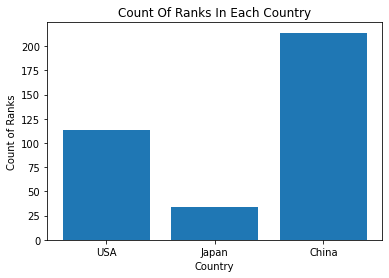

In [51]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["RankCount"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Count of Ranks")
plt.pyplot.title("Count Of Ranks In Each Country")

In [52]:

usa.head()


,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,2,"Summit - IBM Power System AC922, IBM POWER9 22...",2414592,148600,200795,10096.00
1,3,"Sierra - IBM Power System AC922, IBM POWER9 22...",1572480,94640,125712,7438.00
2,5,"Selene - NVIDIA DGX A100, AMD EPYC 7742 64C 2....",555520,63460,79215,2646.00
3,9,"Frontera - Dell C6420, Xeon Platinum 8280 28C ...",448448,23516,38746,2803.95
4,13,"Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...",979072,20159,41461,7578.00


In [ ]:
###########################

In [17]:
from bs4 import BeautifulSoup as bs
import requests
import csv
URL='https://top500.org/statistics/sublist/'
page=requests.get(URL)
page.status_code

soup=bs(page.content,'html')
soup
Processors=soup.find(id='id_procgen')
print(Processors.prettify())

<select class="form-control" id="id_procgen" name="procgen" title="">
 <option value="All">
  All
 </option>
 <option value="1319">
  7300-series "Tigerton"
 </option>
 <option value="1206">
  AMD
 </option>
 <option value="1386">
  AMD Naples
 </option>
 <option value="1383">
  AMD Rome
 </option>
 <option value="1231">
  Alpha
 </option>
 <option value="1235">
  Alpha 21164
 </option>
 <option value="1207">
  Athlon
 </option>
 <option value="1229">
  BQC
 </option>
 <option value="1199">
  Convex
 </option>
 <option value="1309">
  Core 2 Duo (T5xxx)
 </option>
 <option value="1311">
  Core 2 Duo (T6xxx)
 </option>
 <option value="1310">
  Core 2 Duo (T7xxx)
 </option>
 <option value="1308">
  Core 2 Extreme
 </option>
 <option value="1338">
  Core i3
 </option>
 <option value="1339">
  Core i5
 </option>
 <option value="1196">
  Cray
 </option>
 <option value="1197">
  Cray X1
 </option>
 <option value="1198">
  Cray X1E
 </option>
 <option value="1233">
  EV4
 </option>
 <option v

In [21]:
items = soup.select('[name=procgen] option[value]')
values = [item.get('value') for item in items]
textValues = [item.text for item in items]
textValues=textValues[1:]
textValues

['7300-series "Tigerton"',
 'AMD',
 'AMD Naples',
 'AMD Rome',
 'Alpha',
 'Alpha 21164',
 'Athlon',
 'BQC',
 'Convex',
 'Core 2 Duo (T5xxx)',
 'Core 2 Duo (T6xxx)',
 'Core 2 Duo (T7xxx)',
 'Core 2 Extreme',
 'Core i3',
 'Core i5',
 'Cray',
 'Cray X1',
 'Cray X1E',
 'EV4',
 'EV45',
 'EV56',
 'EV6',
 'EV67',
 'EV68',
 'EV7',
 'Fujitsu',
 'Fujitsu A64FX',
 'GRAPE-DR processor',
 'HARP-1E',
 'HP',
 'Hitachi',
 'Hitachi SR8000',
 'Hygon Dhyana',
 'IBM POWER9',
 'IBM Power8+',
 'IBM3090',
 'Intel',
 'Intel 80860',
 'Intel Xeon E3 (Haswell)',
 'Intel Xeon E5 (Broadwell)',
 'Intel Xeon E5 (Haswell)',
 'Intel Xeon E5 (IvyBridge)',
 'Intel Xeon E5 (SandyBridge)',
 'Intel Xeon E7 (Broadwell)',
 'Intel Xeon E7 (Haswell-Ex)',
 'Intel Xeon E7 (IvyBridge)',
 'Intel Xeon Phi',
 'Itanium',
 'Itanium 2',
 'Itanium 2 Fanwood',
 'Itanium 2 Madison 9M',
 'Itanium 2 Montecito',
 'Itanium 2 Montvale',
 'K7 "Argon"',
 'K75 "Pluto/Orion"',
 'KSR',
 'Low Voltage Pentium Xeon',
 'MIPS',
 'Marvell ThunderX2',
 'M

In [252]:
JapanProcessors = pd.DataFrame(japan['System'].str.rstrip(',').str.split(',').str[1])
JapanProcessors
JapanProcessors['System'].value_counts().head()

 Xeon Gold 6148 20C 2.4GHz         7
 A64FX 48C 2.2GHz                  3
 Xeon Platinum 8160  24C 2.1GHz    2
 Intel Xeon Phi 7250 68C 1.4GHz    2
 Xeon Gold 6248 20C 2.5GHz         1
Name: System, dtype: int64

In [253]:
USAProcessors = pd.DataFrame(usa['System'].str.rstrip(',').str.split(',').str[1])
USAProcessors
USAProcessors['System'].value_counts().head()

 Xeon E5-2673v4 20C 2.3GHz        44
 Xeon Platinum 8168 24C 2.7GHz     4
 Xeon E5-2695v4 18C 2.1GHz         4
 Xeon Platinum 8268 24C 2.9GHz     4
 Xeon Gold 6148 20C 2.4GHz         4
Name: System, dtype: int64

In [254]:
ChinaProcessors = pd.DataFrame(china['System'].str.rstrip(',').str.split(',').str[1])
ChinaProcessors
ChinaProcessors['System'].value_counts().head()

 Xeon Gold 6133 20C 2.5GHz    34
 Xeon Gold 6130 16C 2.1GHz    18
 Xeon Gold 6148 20C 2.4GHz    15
 Xeon Gold 5118 12C 2.3GHz    13
 Xeon E5-2680v4 14C 2.4GHz    10
Name: System, dtype: int64

In [178]:
for i in range(0,len(textValues)):
    #print(textValues[i])
    #s=[]
    processor=dfusa["System"].str.find(textValues[i])
    df=dfusa[processor[0:]!= -1].shape[0]
    print(i,textValues[i]+"          ","-----------------",df)
    
#for i in range(0,len(df)):
       ## print(i,textValues[i]+"          ","-----------------",df)
    #dfpro=dfusa[processor[0:]!= -1]
    #print((dfusa[processor[0:]!= -1].shape[0]!=0)==True)
   #,s print(i,textValues[i]+"          ","-----------------",df)
    
#dfpro.head() 
    #dfpro=dfusa[processor[0:]!= -1].apply(str)
    #print(dfpro.head())
#dfjapan

#country=df["System"].str.find('United States')
#dfusa=df[country[0:]!= -1]
#print(dfusa.head())
#df = df.value_counts().rename_axis('unique_values').to_frame('counts')
#print (df)

#s = pd.Series(df.all,name="vals")
#[processor].count()


#jpro=pd.DataFrame(dfjapan['System'].str.rstrip(', ').str.split(', ').str[1])
#jpro['System'].value_counts().nlargest(1)
#jpro
print("**********************************************************************************************************************")


for i in range(0,len(textValues)):
    #print(textValues[i])
    #s=[]
    processor=dfjapan["System"].str.find(textValues[i])
    df=dfjapan[processor[0:]!= -1].shape[0]
    print(i,textValues[i]+"          ","-----------------",df)
print("**********************************************************************************************************************")


for i in range(0,len(textValues)):
    #print(textValues[i])
    #s=[]
    processor=dfchina["System"].str.find(textValues[i])
    df=dfchina[processor[0:]!= -1].shape[0]
    print(i,textValues[i]+"          ","-----------------",df)
    

0 7300-series "Tigerton"           ----------------- 0
1 AMD           ----------------- 7
2 AMD Naples           ----------------- 0
3 AMD Rome           ----------------- 0
4 Alpha           ----------------- 0
5 Alpha 21164           ----------------- 0
6 Athlon           ----------------- 0
7 BQC           ----------------- 0
8 Convex           ----------------- 0
9 Core 2 Duo (T5xxx)           ----------------- 0
10 Core 2 Duo (T6xxx)           ----------------- 0
11 Core 2 Duo (T7xxx)           ----------------- 0
12 Core 2 Extreme           ----------------- 0
13 Core i3           ----------------- 0
14 Core i5           ----------------- 0
15 Cray           ----------------- 14
16 Cray X1           ----------------- 0
17 Cray X1E           ----------------- 0
18 EV4           ----------------- 0
19 EV45           ----------------- 0
20 EV56           ----------------- 0
21 EV6           ----------------- 0
22 EV67           ----------------- 0
23 EV68           ----------------

In [173]:
import pandas as pd
data_dict={"textValues":textValues}
df=pd.DataFrame.from_dict(data_dict)
df=df[1:]
df.head(10)

,textValues
1,AMD
2,AMD Naples
3,AMD Rome
4,Alpha
5,Alpha 21164
6,Athlon
7,BQC
8,Convex
9,Core 2 Duo (T5xxx)
10,Core 2 Duo (T6xxx)


In [80]:
#df.textValues.contains(china.System).value_counts()
pattern = ','.join(textValues)

pattern


china.System.str.contains(pattern).value_counts()
china["System"].str.find(pattern).value_counts()

china[china['System'].isin(textValues)]   
s=china
s.head()


import re
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str
s['matched_str'] = s['System'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern))
s['matched_str'].value_counts()

NA    214
Name: matched_str, dtype: int64

In [ ]:
country=China["System"].str.find('United States')
dfusa=df[country[0:]!= -1]
print(dfusa.head())

In [53]:
########################

In [55]:
data = [[usasummarystats.iloc[1,0],'USA'], [japansummarystats.iloc[1,0],'Japan'], [chinasummarystats.iloc[1,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['RankMean','Country'])
  
# print dataframe.
rankdf

,RankMean,Country
0,235.14,USA
1,173.47,Japan
2,287.52,China


Text(0.5, 1.0, 'Mean Of Ranks In Each Country')

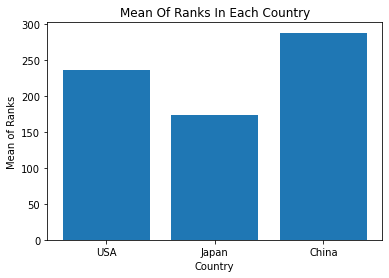

In [56]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["RankMean"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Mean of Ranks")
plt.pyplot.title("Mean Of Ranks In Each Country")

In [57]:
data = [[usasummarystats.iloc[2,0],'USA'], [japansummarystats.iloc[2,0],'Japan'], [chinasummarystats.iloc[2,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_Std','Country'])
  
# print dataframe.
rankdf

,Rank_Std,Country
0,147.06,USA
1,154.56,Japan
2,121.54,China


Text(0.5, 1.0, 'Standard Deviation Of Ranks In Each Country')

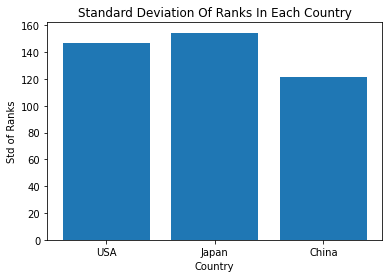

In [58]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_Std"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Std of Ranks")
plt.pyplot.title("Standard Deviation Of Ranks In Each Country")



,Rank_min,Country
0,2.0,USA
1,1.0,Japan
2,4.0,China


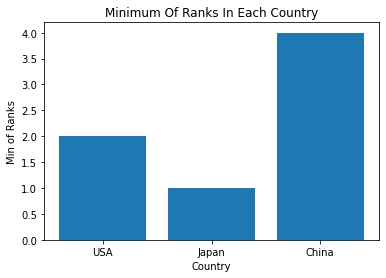

In [61]:
 data = [[usasummarystats.iloc[3,0],'USA'], [japansummarystats.iloc[3,0],'Japan'], [chinasummarystats.iloc[3,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_min','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_min"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Min of Ranks")
plt.pyplot.title("Minimum Of Ranks In Each Country")


Text(0.5, 1.0, 'Q1 Of Ranks In Each Country')

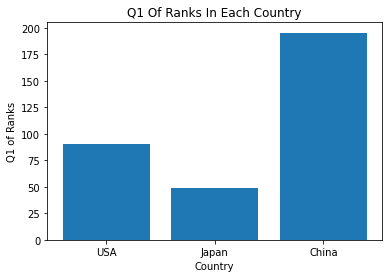

In [65]:
 data = [[usasummarystats.iloc[4,0],'USA'], [japansummarystats.iloc[4,0],'Japan'], [chinasummarystats.iloc[4,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_Q1','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_Q1"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q1 of Ranks")
plt.pyplot.title("Q1 Of Ranks In Each Country")




Text(0.5, 1.0, 'Q2 Of Ranks In Each Country')

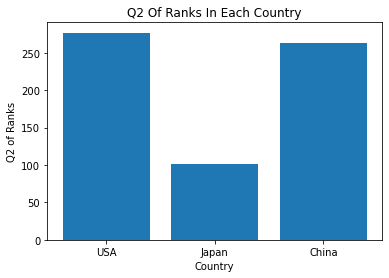

In [64]:
 data = [[usasummarystats.iloc[5,0],'USA'], [japansummarystats.iloc[5,0],'Japan'], [chinasummarystats.iloc[5,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_Q2','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_Q2"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q2 of Ranks")
plt.pyplot.title("Q2 Of Ranks In Each Country")

Text(0.5, 1.0, 'Q3 Of Ranks In Each Country')

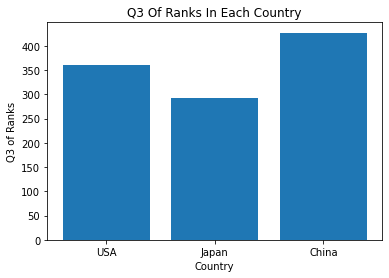

In [66]:
 data = [[usasummarystats.iloc[6,0],'USA'], [japansummarystats.iloc[6,0],'Japan'], [chinasummarystats.iloc[6,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_Q3','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_Q3"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q3 of Ranks")
plt.pyplot.title("Q3 Of Ranks In Each Country")

Text(0.5, 1.0, 'Maximum Of Ranks In Each Country')

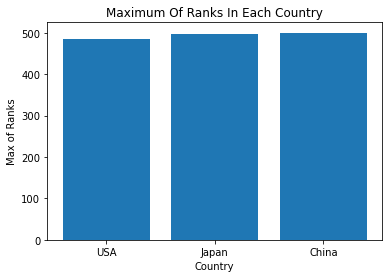

In [69]:
 data = [[usasummarystats.iloc[7,0],'USA'], [japansummarystats.iloc[7,0],'Japan'], [chinasummarystats.iloc[7,0],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rank_max','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rank_max"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Max of Ranks")
plt.pyplot.title("Maximum Of Ranks In Each Country")

Text(0.5, 1.0, 'Count Of Cores In Each Country')

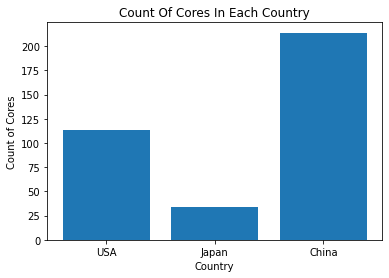

In [71]:
 data = [[usasummarystats.iloc[0,1],'USA'], [japansummarystats.iloc[0,1],'Japan'], [chinasummarystats.iloc[0,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Count','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Count"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Count of Cores")
plt.pyplot.title("Count Of Cores In Each Country")

Text(0.5, 1.0, 'Mean Of Cores In Each Country')

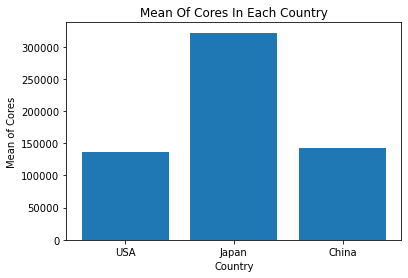

In [73]:
 data = [[usasummarystats.iloc[1,1],'USA'], [japansummarystats.iloc[1,1],'Japan'], [chinasummarystats.iloc[1,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Mean','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Mean"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Mean of Cores")
plt.pyplot.title("Mean Of Cores In Each Country")

Text(0.5, 1.0, 'Standard Deviation Of Cores In Each Country')

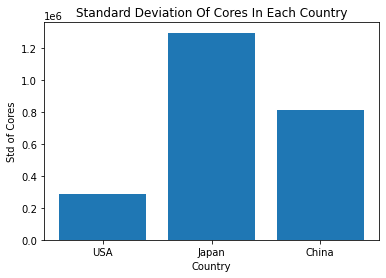

In [76]:
data = [[usasummarystats.iloc[2,1],'USA'], [japansummarystats.iloc[2,1],'Japan'], [chinasummarystats.iloc[2,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Std','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Std"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Std of Cores")
plt.pyplot.title("Standard Deviation Of Cores In Each Country")

Text(0.5, 1.0, 'Minimum Of Cores In Each Country')

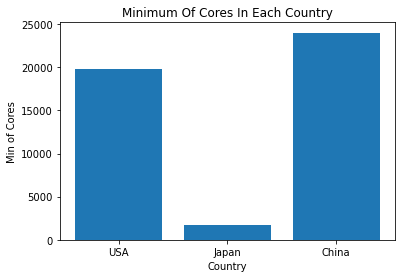

In [78]:
data = [[usasummarystats.iloc[3,1],'USA'], [japansummarystats.iloc[3,1],'Japan'], [chinasummarystats.iloc[3,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Min','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Min"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Min of Cores")
plt.pyplot.title("Minimum Of Cores In Each Country")

Text(0.5, 1.0, 'Q1 Of Cores In Each Country')

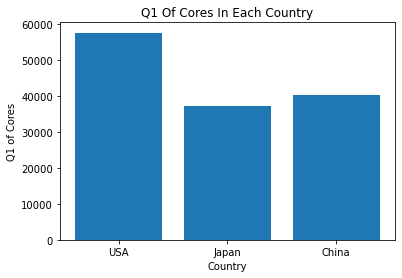

In [79]:
data = [[usasummarystats.iloc[4,1],'USA'], [japansummarystats.iloc[4,1],'Japan'], [chinasummarystats.iloc[4,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Q1','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Q1"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q1 of Cores")
plt.pyplot.title("Q1 Of Cores In Each Country")

Text(0.5, 1.0, 'Q2 Of Cores In Each Country')

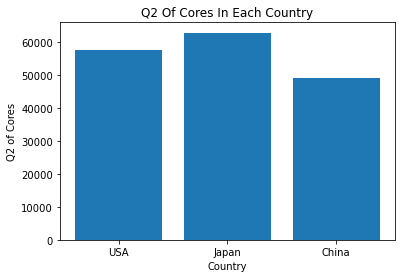

In [80]:
data = [[usasummarystats.iloc[5,1],'USA'], [japansummarystats.iloc[5,1],'Japan'], [chinasummarystats.iloc[5,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Q2','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Q2"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q2 of Cores")
plt.pyplot.title("Q2 Of Cores In Each Country")

Text(0.5, 1.0, 'Q3 Of Cores In Each Country')

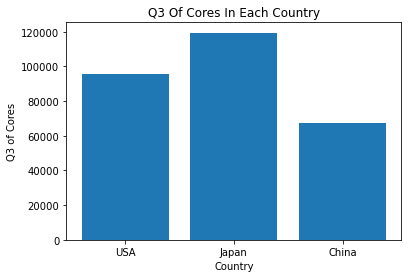

In [81]:
data = [[usasummarystats.iloc[6,1],'USA'], [japansummarystats.iloc[6,1],'Japan'], [chinasummarystats.iloc[6,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Q3','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Q3"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q3 of Cores")
plt.pyplot.title("Q3 Of Cores In Each Country")

Text(0.5, 1.0, 'Maximum Of Cores In Each Country')

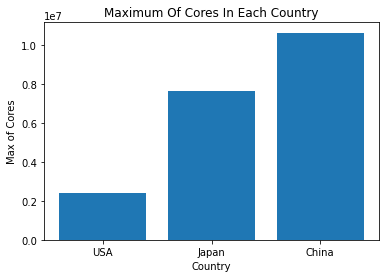

In [82]:
data = [[usasummarystats.iloc[7,1],'USA'], [japansummarystats.iloc[7,1],'Japan'], [chinasummarystats.iloc[7,1],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Cores_Max','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Cores_Max"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Max of Cores")
plt.pyplot.title("Maximum Of Cores In Each Country")

Text(0.5, 1.0, 'Count Of Rpeak In Each Country')

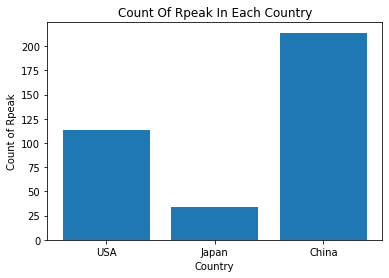

In [84]:
data = [[usasummarystats.iloc[0,3],'USA'], [japansummarystats.iloc[0,3],'Japan'], [chinasummarystats.iloc[0,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Count','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Count"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Count of Rpeak")
plt.pyplot.title("Count Of Rpeak In Each Country")

Text(0.5, 1.0, 'Mean Of Rpeak In Each Country')

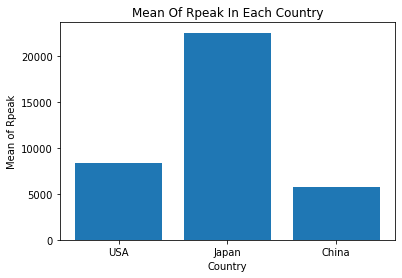

In [85]:
data = [[usasummarystats.iloc[1,3],'USA'], [japansummarystats.iloc[1,3],'Japan'], [chinasummarystats.iloc[1,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Mean','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Mean"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Mean of Rpeak")
plt.pyplot.title("Mean Of Rpeak In Each Country")

Text(0.5, 1.0, 'Standard Deviation Of Rpeak In Each Country')

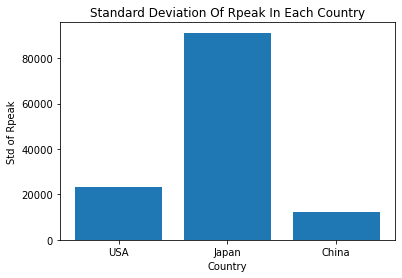

In [87]:
data = [[usasummarystats.iloc[2,3],'USA'], [japansummarystats.iloc[2,3],'Japan'], [chinasummarystats.iloc[2,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Std','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Std"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Std of Rpeak")
plt.pyplot.title("Standard Deviation Of Rpeak In Each Country")

Text(0.5, 1.0, 'Mininum Of Rpeak In Each Country')

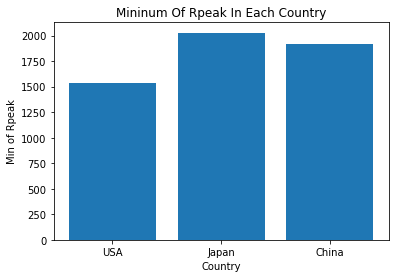

In [88]:
data = [[usasummarystats.iloc[3,3],'USA'], [japansummarystats.iloc[3,3],'Japan'], [chinasummarystats.iloc[3,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Min','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Min"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Min of Rpeak")
plt.pyplot.title("Mininum Of Rpeak In Each Country")

Text(0.5, 1.0, 'Q1 Of Rpeak In Each Country')

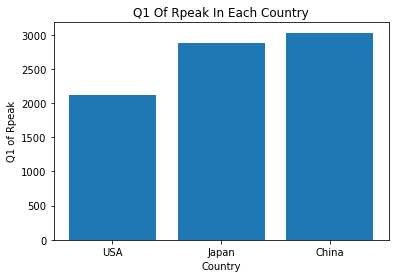

In [90]:
data = [[usasummarystats.iloc[4,3],'USA'], [japansummarystats.iloc[4,3],'Japan'], [chinasummarystats.iloc[4,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Q1','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Q1"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q1 of Rpeak")
plt.pyplot.title("Q1 Of Rpeak In Each Country")

Text(0.5, 1.0, 'Q2 Of Rpeak In Each Country')

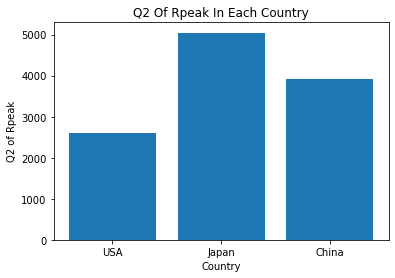

In [91]:
data = [[usasummarystats.iloc[5,3],'USA'], [japansummarystats.iloc[5,3],'Japan'], [chinasummarystats.iloc[5,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Q2','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Q2"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q2 of Rpeak")
plt.pyplot.title("Q2 Of Rpeak In Each Country")

Text(0.5, 1.0, 'Q3 Of Rpeak In Each Country')

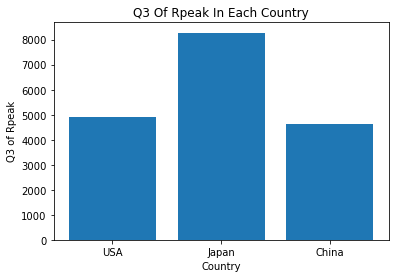

In [92]:
data = [[usasummarystats.iloc[6,3],'USA'], [japansummarystats.iloc[6,3],'Japan'], [chinasummarystats.iloc[6,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Q3','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Q3"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q3 of Rpeak")
plt.pyplot.title("Q3 Of Rpeak In Each Country")

Text(0.5, 1.0, 'Maximum Of Rpeak In Each Country')

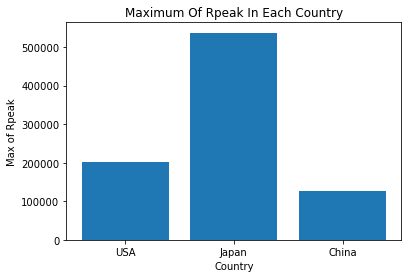

In [93]:
data = [[usasummarystats.iloc[7,3],'USA'], [japansummarystats.iloc[7,3],'Japan'], [chinasummarystats.iloc[7,3],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Rpeak_Max','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Rpeak_Max"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Max of Rpeak")
plt.pyplot.title("Maximum Of Rpeak In Each Country")

Text(0.5, 1.0, 'Count Of Power In Each Country')

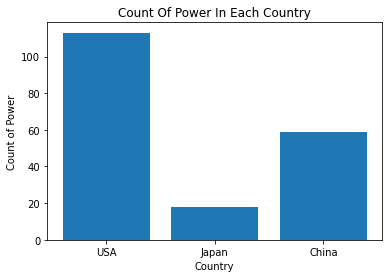

In [94]:
data = [[usasummarystats.iloc[0,4],'USA'], [japansummarystats.iloc[0,4],'Japan'], [chinasummarystats.iloc[0,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Count','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Count"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Count of Power")
plt.pyplot.title("Count Of Power In Each Country")

Text(0.5, 1.0, 'Mean Of Power In Each Country')

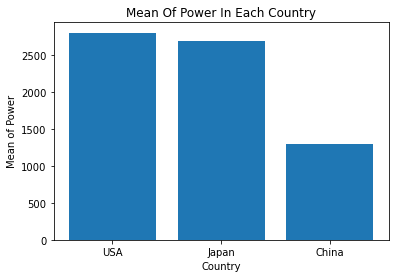

In [95]:
data = [[usasummarystats.iloc[1,4],'USA'], [japansummarystats.iloc[1,4],'Japan'], [chinasummarystats.iloc[1,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Mean','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Mean"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Mean of Power")
plt.pyplot.title("Mean Of Power In Each Country")

Text(0.5, 1.0, 'Standard Deviation Of Power In Each Country')

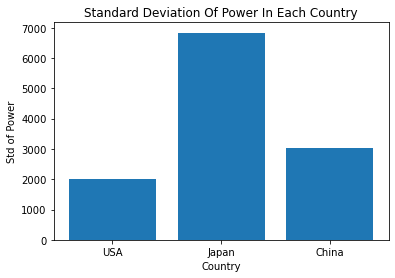

In [96]:
data = [[usasummarystats.iloc[2,4],'USA'], [japansummarystats.iloc[2,4],'Japan'], [chinasummarystats.iloc[2,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Std','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Std"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Std of Power")
plt.pyplot.title("Standard Deviation Of Power In Each Country")

Text(0.5, 1.0, 'Minimum Of Power In Each Country')

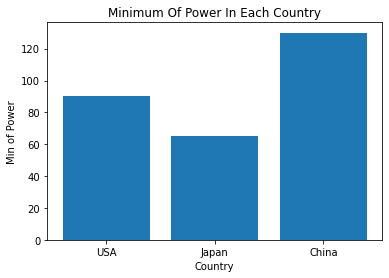

In [97]:
data = [[usasummarystats.iloc[3,4],'USA'], [japansummarystats.iloc[3,4],'Japan'], [chinasummarystats.iloc[3,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Min','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Min"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Min of Power")
plt.pyplot.title("Minimum Of Power In Each Country")

Text(0.5, 1.0, 'Q1 Of Power In Each Country')

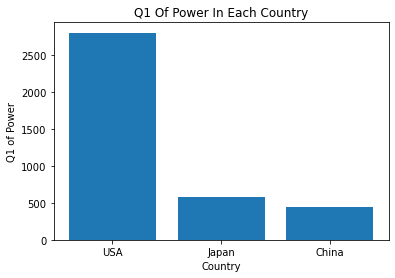

In [98]:
data = [[usasummarystats.iloc[4,4],'USA'], [japansummarystats.iloc[4,4],'Japan'], [chinasummarystats.iloc[4,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Q1','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Q1"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q1 of Power")
plt.pyplot.title("Q1 Of Power In Each Country")

Text(0.5, 1.0, 'Q2 Of Power In Each Country')

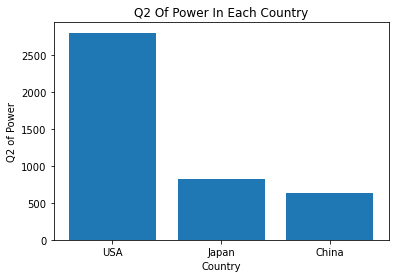

In [100]:
data = [[usasummarystats.iloc[5,4],'USA'], [japansummarystats.iloc[5,4],'Japan'], [chinasummarystats.iloc[5,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Q2','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Q2"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q2 of Power")
plt.pyplot.title("Q2 Of Power In Each Country")

Text(0.5, 1.0, 'Q3 Of Power In Each Country')

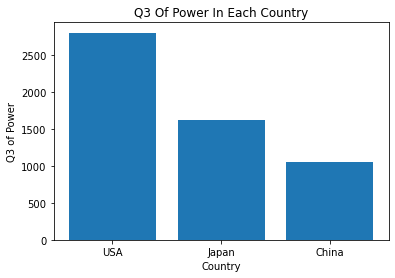

In [101]:
data = [[usasummarystats.iloc[6,4],'USA'], [japansummarystats.iloc[6,4],'Japan'], [chinasummarystats.iloc[6,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Q3','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Q3"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Q3 of Power")
plt.pyplot.title("Q3 Of Power In Each Country")

Text(0.5, 1.0, 'Max Of Power In Each Country')

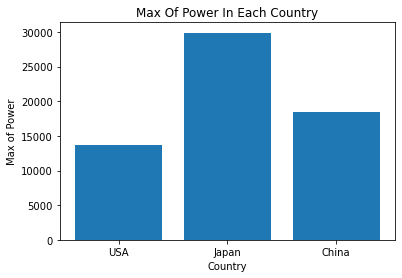

In [102]:
data = [[usasummarystats.iloc[7,4],'USA'], [japansummarystats.iloc[7,4],'Japan'], [chinasummarystats.iloc[7,4],'China']]
  
# Create the pandas DataFrame
rankdf = pd.DataFrame(data, columns = ['Power_Max','Country'])
  
# print dataframe.
rankdf

import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(rankdf['Country'], rankdf["Power_Max"])
plt.pyplot.xlabel("Country")
plt.pyplot.ylabel("Max of Power")
plt.pyplot.title("Max Of Power In Each Country")

In [199]:
#df.boxplot(by ='size', column =['tip'], grid = False)
usasummarystats

,Rank,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
count,113.00,113.00,113.00,113.00,113.00
mean,235.14,136048.07,5917.76,8339.44,2803.95
std,147.06,285704.94,17350.44,23432.96,2019.35
min,2.00,19840.00,1362.00,1531.00,90.00
25%,90.00,57600.00,1649.00,2120.00,2803.95
50%,277.00,57600.00,1841.00,2602.00,2803.95
75%,361.00,95472.00,3319.00,4897.00,2803.95
max,486.00,2414592.00,148600.00,200795.00,13620.00


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             8 non-null      float64
 1   Cores            8 non-null      float64
 2   Rmax (TFlop/s)   8 non-null      float64
 3   Rpeak (TFlop/s)  8 non-null      float64
 4   Power (kW)       8 non-null      float64
dtypes: float64(5)
memory usage: 384.0+ bytes


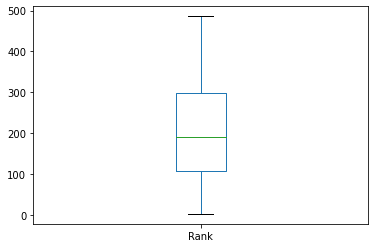

In [204]:
usasummarystats.boxplot('Rank', grid = False)
usasummarystats.info()

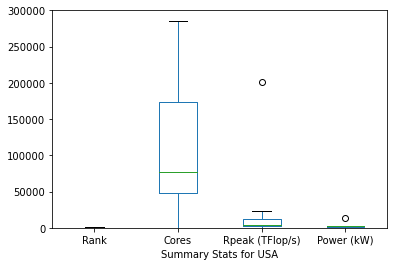

In [219]:
df = pd.DataFrame(usasummarystats, columns=['Rank', 'Cores',  'Rpeak (TFlop/s)', 'Power (kW)'])
ax = df.plot(kind='box')
ax.set_xlabel('Summary Stats for USA')
ax.set_ylabel('')
plt.ylim(0,300000)
plt.show()

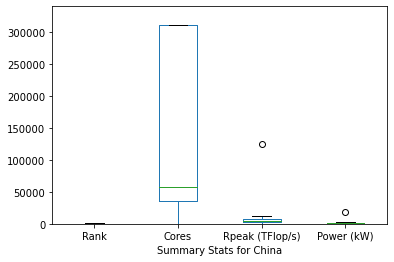

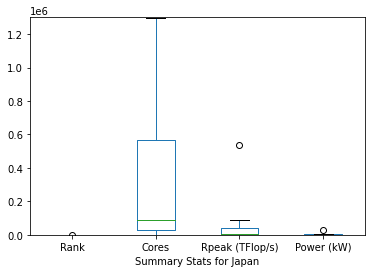

In [247]:
df = pd.DataFrame(chinasummarystats, columns=['Rank', 'Cores',  'Rpeak (TFlop/s)', 'Power (kW)'])
ax = df.plot(kind='box')
ax.set_xlabel('Summary Stats for China')
ax.set_ylabel('')
plt.ylim(0,340000)
plt.show()

df = pd.DataFrame(japansummarystats, columns=['Rank', 'Cores',  'Rpeak (TFlop/s)', 'Power (kW)'])
ax = df.plot(kind='box')
ax.set_xlabel('Summary Stats for Japan')
ax.set_ylabel('')
plt.ylim(0,1300000)
plt.show()